# Option Theory

Covering important concepts for options such as price convergence of binomial model to Black-Scholes, put-call parity

#### Import libraries and modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import Stocks
import EuropeanOptions
import AmericanOptions

# European Options

### Binomial Model

In the binomial model, the price of the underlying asset is assumed to either go up (with a factor $u$) or down (with a factor $d$) as each time step. Based on that, a payoff graph (as below) can be created which shows all possible outcomes for the price of underlying asset at maturity.

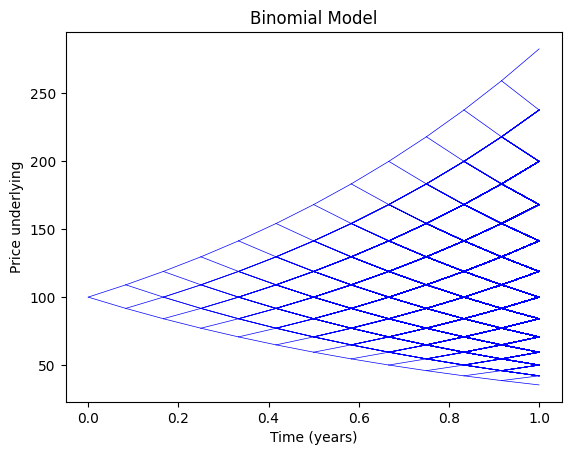

Price of option: 11.68


In [2]:
option = EuropeanOptions.BinomialModel(option_type="call", S=100, K=100, T=1, r=0, sigma=0.3, n=12)
print(option)

### Black Scholes

Black-Scholes is a closed-form equation for calculating the price of an option based on five parameters (current price $S$, strike price $K$, time to maturity $T$, risk-free rate $r$ and volatility $\sigma$). By varying two of these parameters a time, it is possible to create a 3D-plot showing the price of the option with changes in resepctive parameter. Down below is an option price plot with parameters: current stock price $S$ and time to maturity $T$.

/Users/pontushovberger/Documents/GitHub Projects/Option-Pricing/EuropeanOptions.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


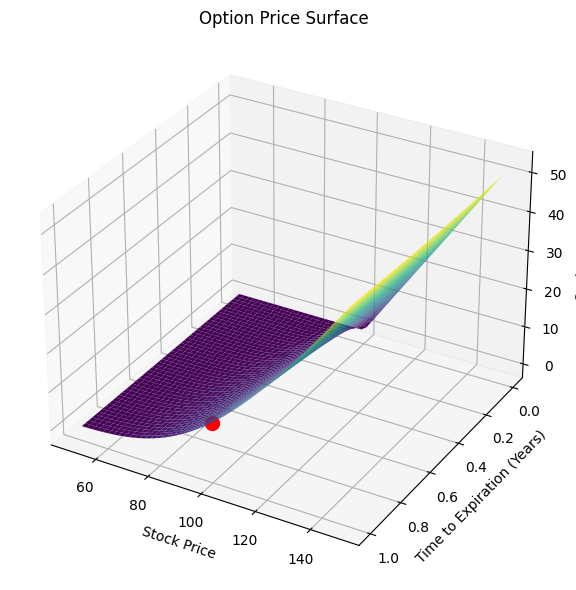

Price of option is: 11.924


In [3]:
option = EuropeanOptions.BlackScholes(option_type="call", S=100, K=100, T=1, r=0, sigma=0.3)
print(option)

## Convergence of Binomial Model to Black-Scholes

With increased number of time steps $n$, the price obtained in the Binomial Model will convergence to the price in Black-Scholes.

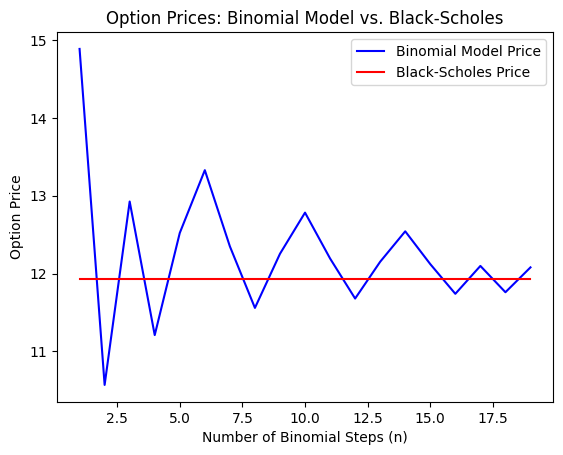

In [4]:
binomial_price = []
black_scholes_price = []
    
# Add points to the plot
for i in range(1,20):
    binomial_price.append(EuropeanOptions.BinomialModel(option_type="call", S=100, K=100, T=1, r=0, sigma=0.3, n=i).price)
    black_scholes_price.append(EuropeanOptions.BlackScholes(option_type="call", S=100, K=100, T=1, r=0, sigma=0.3).price)

# Plot the results
plt.plot(range(1,20), binomial_price, label='Binomial Model Price', color='blue')
plt.plot(range(1,20), black_scholes_price, label='Black-Scholes Price', color='red')
plt.title("Option Prices: Binomial Model vs. Black-Scholes")
plt.xlabel("Number of Binomial Steps (n)")
plt.ylabel("Option Price")
plt.legend()
plt.show()

## Put-Call Parity

In [5]:
S = 100
K = 100
T = 1
r = 0

call_price = EuropeanOptions.BlackScholes(option_type="call", S=S, K=K, T=T, r=r, sigma=0.3).price
put_price = EuropeanOptions.BlackScholes(option_type="put", S=S, K=K, T=T, r=r, sigma=0.3).price

put_call_parity = K * np.exp(-r*T) + call_price - S

print("Call price:", round(call_price, 3))
print("Put price:", round(put_price, 3))
print("Put price (Put-Call Parity):", round(put_call_parity, 3))

Call price: 11.924
Put price: 11.924
Put price (Put-Call Parity): 11.924


# American Options

### Geometric Brownian Motion

In pricing of american options, an important concept is that of Brownian Motion. Brownian Motion are used to model the possible price paths of an asset

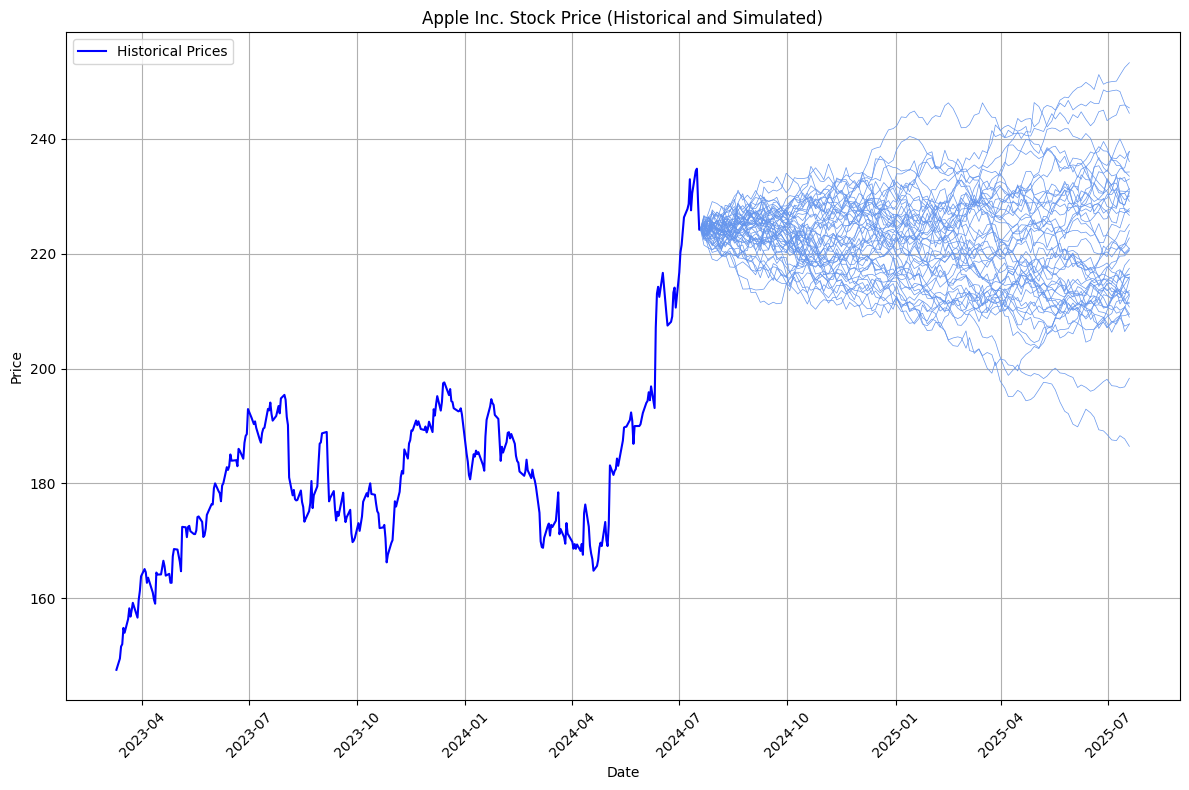

In [6]:
stock = Stocks.Stock('AAPL')
brownian_motion = Stocks.GeometricBrownianMotion(stock.price, stock.mu(365), stock.vol(365), 1)
Stocks.plot_stock_and_gbm(stock, brownian_motion)

## Price compared to European Options

Since american options can be exercised early (before maturity date), the price of american options will always be larger than that of equvialent european options. There is no closed form calculation of american option prices, instead Longstaff Schwartz is a stochastic method.

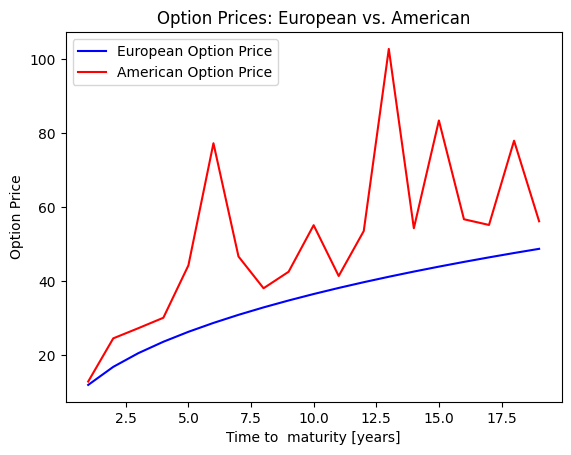

In [7]:
european_option = []
american_option = []
    
# Add points to the plot
for t in range(1, 20):
    european_option.append(EuropeanOptions.BlackScholes(option_type="call", S=100, K=100, T=t, r=0, sigma=0.3).price)
    american_option.append(AmericanOptions.LongstaffSchwartz(option_type="call", S=100, K=100, T=t, r=0, sigma=0.3, mu=0).price)

# Plot the results
plt.plot(range(1, 20), european_option, label='European Option Price', color='blue')
plt.plot(range(1, 20), american_option, label='American Option Price', color='red')
plt.title("Option Prices: European vs. American")
plt.xlabel("Time to  maturity [years]")
plt.ylabel("Option Price")
plt.legend()
plt.show()